TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

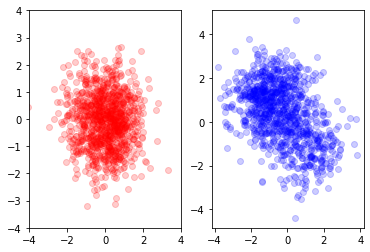

In [27]:
import numpy as np
import random
import math
import numdifftools
import matplotlib.pyplot as plt
import matplotlib.animation as animation

e = math.e
pi = math.pi

def F(z): 
    rx = abs(z[0] - center[0])
    ry = abs(z[1] - center[1])# Random point in the cluster
    alpha = 1.5 # Consistent with the density (As this gets larger, less samples are moved close to 0)
    xval = rx * math.erf(rx/alpha) + (alpha/math.sqrt(pi)) * math.pow(e, -(rx/alpha) ** 2)
    yval = ry * math.erf(ry/alpha) + (alpha/math.sqrt(pi)) * math.pow(e, -(ry/alpha) ** 2)
    return (xval, yval)

def BetaCalculation():
    Proportion = 0.5
    xSummationDerivative = [0, 0]
    ySummationDerivative = [0, 0]
    Beta = []
    for j in range(0, len(StandardNormal)):
        #CurTuple = F(StandardNormal[j])
        ySummationDerivative[0] += F(StandardNormal[j])[0]
        ySummationDerivative[1] += F(StandardNormal[j])[1]
    for i in range(0, len(MixtureSample)):
        xSummationDerivative[0] += F(MixtureSample[i])[0]
        xSummationDerivative[1] += F(MixtureSample[i])[1]
    Beta.append((-1/len(MixtureSample)) * xSummationDerivative[0] + \
        (1/len(StandardNormal)) * ySummationDerivative[0])
    Beta.append((-1/len(MixtureSample)) * xSummationDerivative[1] + \
        (1/len(StandardNormal)) * ySummationDerivative[1])
    return np.multiply(Beta, Proportion)

def u(x, Beta):
    xval = (x[0] ** 2 / 2) + Beta[0] * F(x)[0] + Beta[0] * F(x)[0]
    yval = (x[1] ** 2 / 2) + Beta[1] * F(x)[1] + Beta[0] * F(x)[1]
    return (xval, yval)

def uConjugate(y, Beta):
    ConvexCandidate = []
    for i in range(0, len(MixtureSample)):
        xval = (MixtureSample[i][0] * y) - u(MixtureSample[i], Beta)[0]
        yval = (MixtureSample[i][1] * y) - u(MixtureSample[i], Beta)[1]
        ConvexCandidate.append((xval, yval))
    SumList = []
    for i in range(len(ConvexCandidate)):
        SumList = ConvexCandidate[i][0] + ConvexCandidate[i][1]
    index = SumList.index(max(SumList))
    return ConvexCandidate[index]

def SamplesUpdate(OldMixtureSample):
    NewMixtureSample = []
    for i in range(0, len(OldMixtureSample)):
        delta = numdifftools.Gradient(F)([OldMixtureSample[i]])
        xval = OldMixtureSample[i][0] + Beta[0] * delta[0]
        yval = OldMixtureSample[i][1] + Beta[1] * delta[1]
        NewMixtureSample.append([xval, yval])
    NewMixtureSample = np.array(NewMixtureSample)
    return NewMixtureSample

def MixtureSampleGenerator():
    mean1 = [1, -1]
    cov1 = [[1, 0], [0, 1]]
    mean2 = [-1, 1]
    cov2 = [[1, 0], [0, 1]]
    x = np.random.multivariate_normal(mean1, cov1, 1000)
    y = np.random.multivariate_normal(mean2, cov2, 1000)
    MixtureSample = []
    for i in range(1000):
        RandomSelector = random.random()
        if RandomSelector > 0.7:
            MixtureSample.append(x[i])
        else:
            MixtureSample.append(y[i])
    MixtureSample = np.array(MixtureSample)
    return MixtureSample

def StandardNormalGenerator():
    Sample = []
    x = np.random.standard_normal(1000)
    y = np.random.standard_normal(1000)
    for i in range(1000):
        Sample.append([x[i], y[i]])
    return Sample


#------------------------------------------------------------- PLOTTING --------------------------------------------------------------
MixtureSample = MixtureSampleGenerator()
StandardNormal = StandardNormalGenerator()

plt.subplot(1,2,1)
plt.scatter(*zip(*StandardNormal), color = 'r', alpha = 0.2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.subplot(1,2,2)
plt.scatter(*zip(*MixtureSample), color = 'b', alpha = 0.2)

for i in range(50): # Maybe there is a problem of overfitting
    center = StandardNormal[random.randint(0, len(StandardNormal) - 1)]
    Beta = BetaCalculation()
    MixtureSample = SamplesUpdate(MixtureSample)

plt.scatter(*zip(*MixtureSample), color = 'g', alpha = 0.2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
